In [28]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=92cea0001d0779a74a3bf0ec20421e6848df6313e7168c74c8c8eae8d194d01c
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [3]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [4]:
name = 'GOOG'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2020-09-10")
x = df['Close']


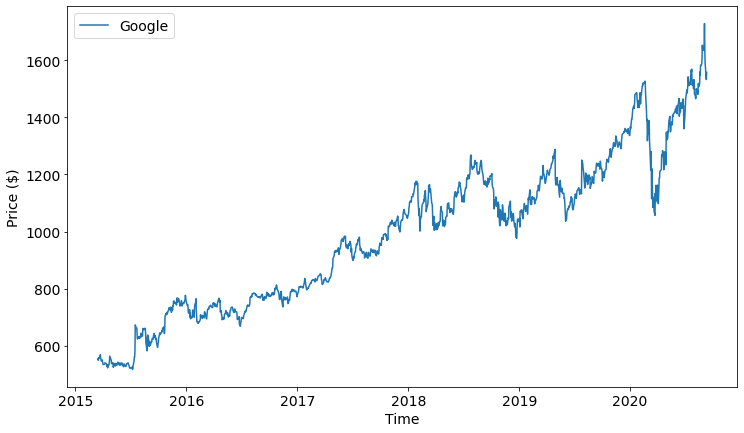

In [6]:
plt.plot(x,label="Google")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [7]:
returns = x.pct_change(1).dropna()

In [10]:
returns[0:10]

Date
2015-03-17   -0.006619
2015-03-18    0.015728
2015-03-19   -0.002706
2015-03-20    0.004259
2015-03-23   -0.002774
2015-03-24    0.020367
2015-03-25   -0.019995
2015-03-26   -0.006478
2015-03-27   -0.012300
2015-03-30    0.006730
Name: Close, dtype: float64

In [12]:
(x[1]-x[0])/x[0]

-0.0066185645310041195

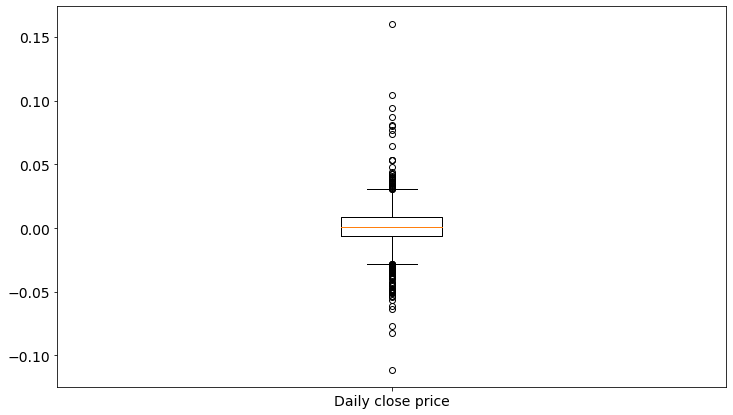

In [17]:
plt.boxplot(returns,labels=["Daily close price"])


plt.show()

In [25]:
returns.describe()

count    1382.000000
mean        0.000893
std         0.017015
min        -0.111008
25%        -0.006044
50%         0.000906
75%         0.008677
max         0.160524
Name: Close, dtype: float64

In [18]:
np.mean(returns)

0.0008932051169460345

In [19]:
np.std(returns)

0.0170093233684501

In [20]:
np.quantile(returns,0.5)

0.0009058328999008713

In [21]:
skew(returns)

0.5494403255945719

In [27]:
skewtest(returns)

SkewtestResult(statistic=7.860140744014309, pvalue=3.83702079981769e-15)

In [22]:
kurtosis(returns)

11.114385899508688

In [29]:
kurtosistest(returns)

KurtosistestResult(statistic=16.36199149673519, pvalue=3.5725128956739287e-60)

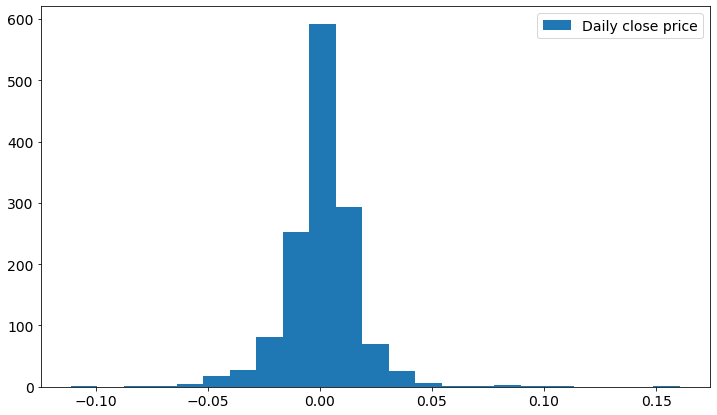

In [24]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [30]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

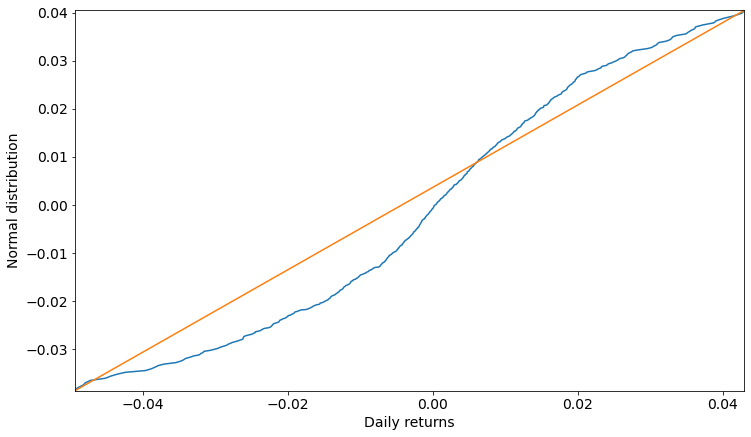

In [31]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

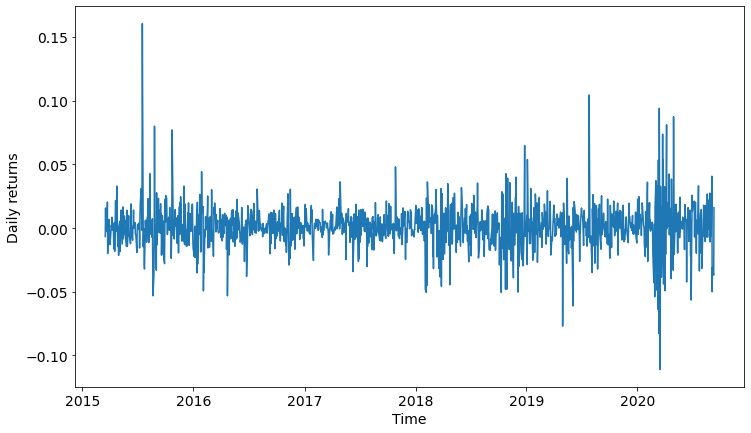

In [32]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

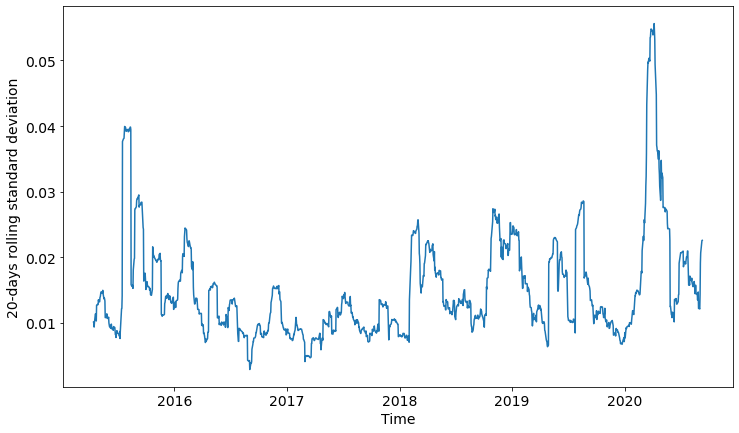

In [33]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

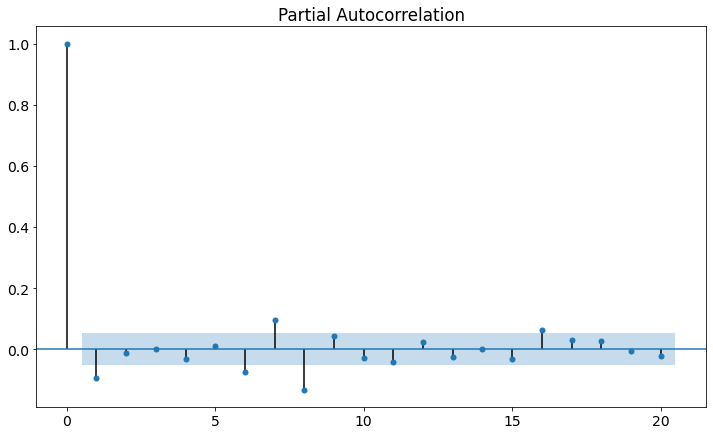

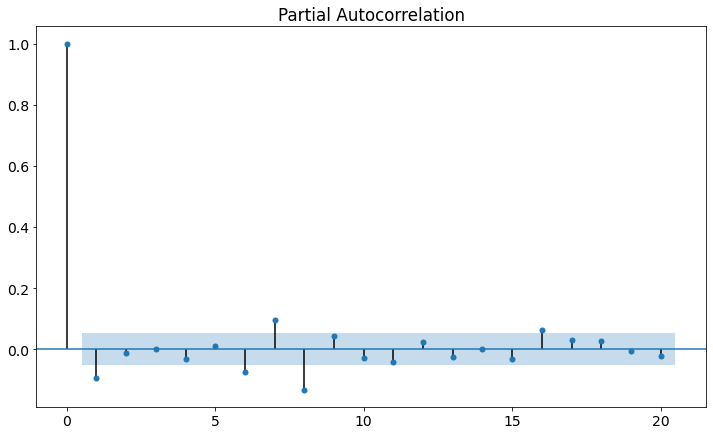

In [209]:
plot_pacf(returns,lags=20)